In [5]:
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
from marvin import config
config.setDR('DR16')

from marvin.tools.maps import Maps

# import Marvin plot map utility function
import marvin.utils.plot.map as mapplot
%matplotlib inline

In [95]:
np.set_printoptions(threshold=sys.maxsize)
# select a galaxy
plateifu = '8990-3704'

# instanstiate a Marvin maps
maps = Maps(plateifu=plateifu)

# grab the NII/Ha flux ratio, Ha and NII equivalent width arrays

nii = np.nanmean( np.where( maps.emline_gflux_nii_6585.value >= 0, maps.emline_gflux_nii_6585.value, np.nan ) )
ha  = np.nanmean( np.where( maps.emline_gflux_ha_6564.value >= 0, maps.emline_gflux_ha_6564.value, np.nan ) )
logniiha = np.log10(nii/ha)

ewha  = np.nanmean( np.where( maps['emline_sew_ha_6564'].value >= 0, maps['emline_sew_ha_6564'].value, np.nan ) )
ewnii = np.nanmean( np.where( maps['emline_sew_nii_6585'].value >= 0, maps['emline_sew_nii_6585'].value, np.nan ) )
print( logniiha )
print( np.mean(ewha) )
print( np.mean(ewnii) )
# take the log of the NII/Ha ratio
#logniiha = np.log10(niiha.value)

0.3702349
0.3071714
0.9233388


In [72]:
# create the WHAN categories
psf = (logniiha < -0.4) & (ewha.value > 3)
sagn = (logniiha > -0.4) & (ewha.value > 6)
wagn = (logniiha > -0.4) & ((ewha.value > 3) & (ewha.value < 6))
rg = ewha.value < 3
pg = (ewha.value < 0.5) & (ewnii.value < 0.5)

NameError: name 'ewnii' is not defined

In [10]:
# create a custom array for a WHAN categories (we copy the EW Ha array just to get a 2d-array of the original size)
value = ewha.value.copy()
value[psf] = 1     # pure star-forming
value[sagn] = 2    # strong agn
value[wagn] = 3    # weak agn
value[rg] = 4      # retired galaxies
value[pg] = 5      # passive galaxies

# Set ivar to 0 where the SNR < 1
niiha_low_snr = mapplot.mask_low_snr(niiha.value, niiha.ivar, snr_min=1)
ewha_low_snr = mapplot.mask_low_snr(ewha.value, ewha.ivar, snr_min=1)
ewnii_low_snr = mapplot.mask_low_snr(ewnii.value, ewnii.ivar, snr_min=1)
low_snr = np.logical_or(niiha_low_snr, ewha_low_snr, ewnii_low_snr)

ivar = ewha.value.copy()
ivar[low_snr] = 0

nocov = ewha.pixmask.get_mask('NOCOV')

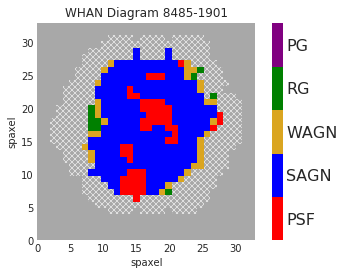

[WARNING]: showImage is deprecated as of Marvin 2.3.0. Please use marvin.tools.image.Image instead. (MarvinDeprecationWarning)
--- Logging error ---
Traceback (most recent call last):
  File "D:\Anaconda\lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "D:\Anaconda\lib\logging\handlers.py", line 394, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "D:\Anaconda\lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
OSError: [WinError 87] 參數錯誤。: 'C:\\Users\\user\\.marvin\\marvin.log' -> 'C:\\Users\\user\\.marvin\\marvin.log.2021-12-05_00:00:00'
Call stack:
  File "D:\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\Anaconda\lib\site-packages\traitlets\config\application.py", line 664, in launch_

Text(0.5, 1.0, '8485-1901')

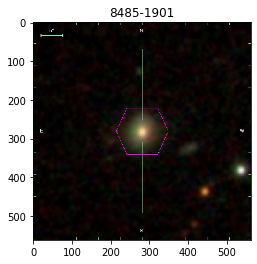

In [11]:
# create a custom colormap
cmap = colors.ListedColormap(['red', 'blue', 'goldenrod', 'green', 'purple'])

# use Marvin plotting to plot our WHAN diagram
fig, ax, cb = mapplot.plot(value=value, ivar=ivar, mask=nocov, cmap=cmap, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5),
                           title='WHAN Diagram {}'.format(plateifu))


# Set the custom colorbar axis values
cb.set_ticks([1, 2, 3, 4, 5])
cb.set_ticklabels(['PSF', 'SAGN', 'WAGN', 'RG', 'PG'])

# plot the figure
plt.show()

# let's also show the optical image
from marvin.utils.general.images import showImage
image = showImage(plateifu=plateifu, show_image=False)
img = plt.imshow(image)
plt.title(str(plateifu))

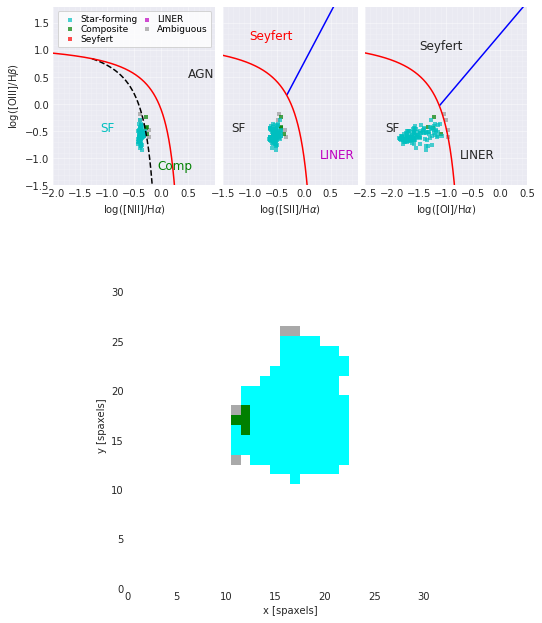

In [12]:
# compare with the BPT diagram for this galaxy
mask, fig, axes = maps.get_bpt()